In [15]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Read the data
data <- read.csv("emd_values_corrected.csv")

In [57]:
data

Strain,Condition,EMD,Metric,scaled_EMD
<chr>,<chr>,<dbl>,<chr>,<dbl>
wild-type,HT:L||OS:L,71.7350737,Total_Counts,0.5692876860
wild-type,HT:L||OS:M,88.9676351,Total_Counts,0.7122808707
wild-type,HT:L||OS:H,123.6415782,Total_Counts,1.0000000000
DCLPA,HT:L||OS:L,134.8418468,Total_Counts,0.4433855107
DCLPA,HT:L||OS:M,123.1473329,Total_Counts,0.4046429278
DCLPA,HT:L||OS:H,302.8568679,Total_Counts,1.0000000000
DCLPB,HT:L||OS:L,47.4143271,Total_Counts,1.0000000000
DCLPB,HT:L||OS:M,23.4203463,Total_Counts,0.4905789828
DCLPB,HT:L||OS:H,26.3170163,Total_Counts,0.5520787644


In [68]:
options(repr.plot.width=4, repr.plot.height=3)

In [69]:
# Plot for Metric == Median_TC
p1 <- ggplot(data %>% filter(Metric == "Total_Counts"), 
             aes(x = Condition, y = Strain, size = EMD, color = Strain)) +
  geom_point(alpha = 0.7) +
  scale_x_discrete(limits = c("HT:L||OS:L", "HT:L||OS:M", "HT:L||OS:H")) +
  labs(y = "Strain", title = "Total insertions EMD distances") +
  theme_minimal() +ggpubr::theme_classic2()


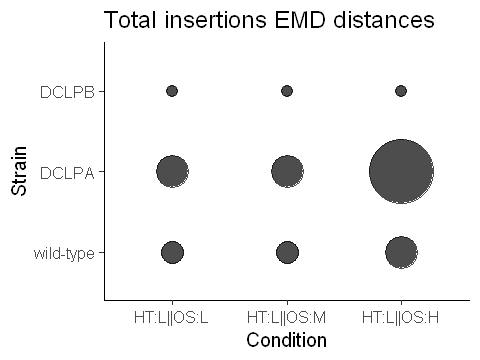

In [88]:

# Discretize the EMD values
data <- data %>%
  mutate(size_group = case_when(
    EMD < 50  ~ "small",
    EMD >= 50 & EMD < 100 ~ "medium",
    EMD >= 100 & EMD < 150 ~ "large",
    EMD >= 150 ~ "x-large"
  ))

# Plot
p1 <- ggplot(data %>% filter(Metric == "Total_Counts"), 
             aes(x = Condition, y = Strain, size = size_group)) +
  geom_point(alpha = 0.7) +
  scale_x_discrete(limits = c("HT:L||OS:L", "HT:L||OS:M", "HT:L||OS:H")) +
  scale_size_manual(values = c("small" = 3, "medium" = 6, "large" = 9, "x-large" = 18)) +
  labs(y = "Strain", title = "Total insertions EMD distances") +scale_y_discrete(limits = c("wild-type", "DCLPA", "DCLPB"))+
  theme_minimal() +
  ggpubr::theme_classic2()+
  theme(legend.position = "none")

p1


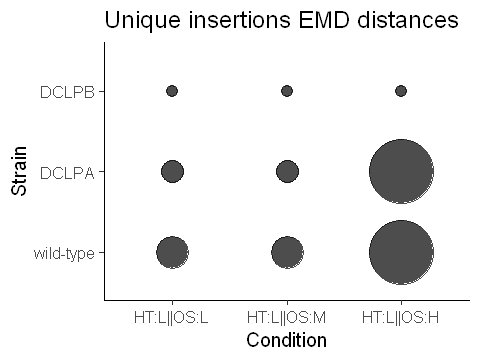

In [87]:
# Discretize the EMD values
data <- data %>%
  mutate(size_group = case_when(
    EMD <= 0.5  ~ "small",
    EMD > 0.5 & EMD <= 1.5 ~ "medium",
    EMD > 1.5 & EMD <= 3.5 ~ "large",
    EMD > 3.5 & EMD <= 7 ~ "x-large"
  ))

# Plot
p2 <- ggplot(data %>% filter(Metric == "Unique_Counts"), 
             aes(x = Condition, y = Strain, size = size_group)) +
  geom_point(alpha = 0.7) +
  scale_x_discrete(limits = c("HT:L||OS:L", "HT:L||OS:M", "HT:L||OS:H")) +
  scale_size_manual(values = c("small" = 3, "medium" = 6, "large" = 9, "x-large" = 18)) +
  labs(y = "Strain", title = "Unique insertions EMD distances") +scale_y_discrete(limits = c("wild-type", "DCLPA", "DCLPB"))+
  theme_minimal() +
  ggpubr::theme_classic2() +
  theme(legend.position = "none")

p2


In [89]:
suppressMessages(suppressWarnings(library("grid")))

In [90]:
suppressMessages(suppressWarnings(library("gridExtra")))

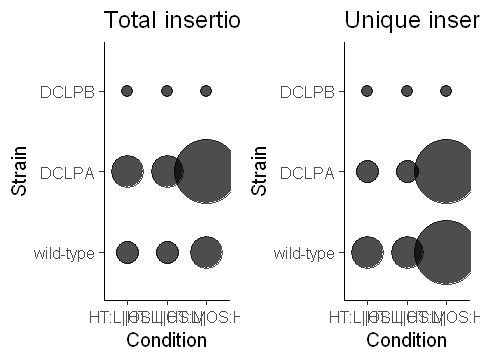

In [91]:
p <- grid.arrange(p1, p2,ncol=2)

In [92]:
ggsave(filename = "../PNAS/FIGURES/Fig4b.pdf", device = "pdf",  plot = p, width = 8, height =3 , dpi = 300, units = "in")